# Federal Funding: Elementary vs Postsecondary Education (2000-2022)

This notebook analyzes and compares federal funding trends between elementary and postsecondary education in the United States, focusing on allocation patterns, key policy changes, and the impact of emergency relief programs like the CARES Act. Through data visualizations and program-specific breakdowns, the project offers insights into how educational funding priorities have evolved over the last two decades.


In [1]:
# Data handling and visualization
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go  
from plotly.subplots import make_subplots

# Machine learning models and tools
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Statistical modeling and analysis
import statsmodels.api as sm
from statsmodels.formula.api import ols, logit
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.seasonal import seasonal_decompose


## Importing and Exploring Elementary Education Funding Data


In [2]:
elemenfund = pd.read_csv('ElemenFund .csv')
elemenfund = pd.read_csv('ElemenFund .csv', na_values = ['†', '---'])

elemenfund.head()

,Year,2000,2010,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Department of Education,"20,039,563","39,646,475","37,488,221","37,394,190","38,648,865","38,607,172","40,301,588","40,775,232","55,245,737","224,363,687","44,675,668"
1,Education for the disadvantaged,"8,529,111","15,864,666","15,552,693","15,536,107","15,963,018","16,143,790","16,443,790","16,543,790","16,996,790","17,226,790","18,229,790"
2,Impact aid program,"877,101","1,276,183","1,288,603","1,288,603","1,305,603","1,328,603","1,414,112","1,446,112","1,486,112","1,501,112","1,557,112"
3,School improvement programs,"2,549,971","6,999,862","5,599,600","5,478,097","5,851,330","5,447,396","6,326,477","6,473,277","6,718,782","6,775,467","7,257,565"
4,Indian education,"65,285","127,282","123,939","123,939","143,939","164,939","180,239","180,239","180,739","181,239","189,246"


### Reshaping and Cleaning Elementary Education Funding Data


In [3]:
elemenfund = pd.melt(elemenfund, id_vars = 'Year', value_vars = ['2000', '2010', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
elemenfund = elemenfund.rename(columns = {'Year': 'Elementary Level Program',
                          'variable': 'Year',
                          'value': 'Funding'})
elemenfund['Funding'] = elemenfund['Funding'].str.replace(',', '')
elemenfund['Funding'] = elemenfund['Funding'].str.replace('$', '')
#fedfund['Funding'] = fedfund['Funding'].str.replace('---', np.nan)
elemenfund['Funding'] = elemenfund['Funding'].str.replace('-', '')
elemenfund['Funding'] = elemenfund['Funding'].astype(float)


elemenfund.head(10)



,Elementary Level Program,Year,Funding
0,Department of Education,2000,20039563.0
1,Education for the disadvantaged,2000,8529111.0
2,Impact aid program,2000,877101.0
3,School improvement programs,2000,2549971.0
4,Indian education,2000,65285.0
5,English Language Acquisition,2000,362662.0
6,Special education,2000,4948977.0
7,Vocational and adult education,2000,1462977.0
8,Education Reform--Goals 2000,2000,1243479.0
9,Hurricane Education Recovery,2000,NaN


In [4]:
if 'Funding' in elemenfund.columns:
    if pd.api.types.is_numeric_dtype(elemenfund['Funding']):
        
        elemenfund['Funding'] = elemenfund['Funding'].replace(0, np.nan)
    
        elemenfund['logfund'] = np.log(elemenfund['Funding'])
    else:
        raise ValueError("The 'Funding' column is not numeric. Please ensure it's properly cleaned and converted.")
else:
    raise ValueError("The 'Funding' column does not exist in the DataFrame.")


print(elemenfund.head())

               Elementary Level Program  Year     Funding    logfund
0               Department of Education  2000  20039563.0  16.813219
1      Education for the disadvantaged   2000   8529111.0  15.958996
2                    Impact aid program  2000    877101.0  13.684377
3           School improvement programs  2000   2549971.0  14.751593
4                     Indian education   2000     65285.0  11.086518


### Final Elementary Education Funding Dataset Preview


In [5]:
#Final Elemenfund data set
elemenfund.head(10)

,Elementary Level Program,Year,Funding,logfund
0,Department of Education,2000,20039563.0,16.813219
1,Education for the disadvantaged,2000,8529111.0,15.958996
2,Impact aid program,2000,877101.0,13.684377
3,School improvement programs,2000,2549971.0,14.751593
4,Indian education,2000,65285.0,11.086518
5,English Language Acquisition,2000,362662.0,12.801227
6,Special education,2000,4948977.0,15.414691
7,Vocational and adult education,2000,1462977.0,14.195984
8,Education Reform--Goals 2000,2000,1243479.0,14.033424
9,Hurricane Education Recovery,2000,NaN,NaN


## Importing and Exploring Postsecondary Education Funding Data


In [6]:
postfund = pd.read_csv('Postfund.csv')
postfund.head()

,Year,2000,2010,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Department of Education,"10,727,315","35,518,187","51,896,533","56,994,579","44,128,936","82,309,464","51,025,715","74,809,625","179,320,427","202,738,836","542,808,446"
1,Student financial assistance,"9,060,317","24,596,640","30,589,493","29,351,512","30,130,183","31,199,052","31,754,748","31,572,669","31,663,815","31,099,903","29,676,848"
2,Direct Loan Program,"-2,862,240","3,481,859","16,254,117","23,660,742","9,878,116","37,028,295","13,619,843","36,528,795","114,143,528","98,173,183","474,121,269"
3,Federal Family Education Loan (FFEL) Program,"2,707,473","4,274,364","2,269,320","1,362,692","1,446,784","11,155,845","2,545,960","3,661,416","16,599,386","6,584,881","34,896,379"
4,Higher education,"1,530,779","2,740,665","2,322,592","2,161,224","2,219,845","2,292,844","2,484,721","2,551,546","2,715,747","2,782,126","3,234,576"


In [7]:
postfund = pd.read_csv('Postfund.csv', na_values = ['†', '---'])
postfund.head(5)

,Year,2000,2010,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Department of Education,"10,727,315","35,518,187","51,896,533","56,994,579","44,128,936","82,309,464","51,025,715","74,809,625","179,320,427","202,738,836","542,808,446"
1,Student financial assistance,"9,060,317","24,596,640","30,589,493","29,351,512","30,130,183","31,199,052","31,754,748","31,572,669","31,663,815","31,099,903","29,676,848"
2,Direct Loan Program,"-2,862,240","3,481,859","16,254,117","23,660,742","9,878,116","37,028,295","13,619,843","36,528,795","114,143,528","98,173,183","474,121,269"
3,Federal Family Education Loan (FFEL) Program,"2,707,473","4,274,364","2,269,320","1,362,692","1,446,784","11,155,845","2,545,960","3,661,416","16,599,386","6,584,881","34,896,379"
4,Higher education,"1,530,779","2,740,665","2,322,592","2,161,224","2,219,845","2,292,844","2,484,721","2,551,546","2,715,747","2,782,126","3,234,576"


### Reshaping and Cleaning Postsecondary Education Funding Data


In [8]:
postfund = pd.melt(postfund, id_vars = 'Year', value_vars = ['2000', '2010', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'])
postfund = postfund.rename(columns = {'Year': 'Postsecondary Level',
                          'variable': 'Year',
                          'value': 'Funding'})
postfund['Funding'] = postfund['Funding'].str.replace(',', '')
postfund['Funding'] = postfund['Funding'].str.replace('$', '')
#fedfund['Funding'] = fedfund['Funding'].str.replace('---', np.nan)
postfund['Funding'] = postfund['Funding'].str.replace('-', '')
postfund['Funding'] = postfund['Funding'].astype(float)


postfund.head()


,Postsecondary Level,Year,Funding
0,Department of Education,2000,10727315.0
1,Student financial assistance,2000,9060317.0
2,Direct Loan Program,2000,2862240.0
3,Federal Family Education Loan (FFEL) Program,2000,2707473.0
4,Higher education,2000,1530779.0


In [40]:
# Strip leading and trailing whitespace from the 'Elementary Level Program' column
elemenfund['Elementary Level Program'] = elemenfund['Elementary Level Program'].str.strip()

top_programs = elemenfund.groupby('Elementary Level Program')['Funding'].sum().nlargest(8).index
filtered_data = elemenfund[elemenfund['Elementary Level Program'].isin(top_programs)]

In [41]:
if 'Funding' in postfund.columns:
    if pd.api.types.is_numeric_dtype(postfund['Funding']):
        
        postfund['Funding'] = postfund['Funding'].replace(0, np.nan)
    
        postfund['logfund'] = np.log(postfund['Funding'])
    else:
        raise ValueError("The 'Funding' column is not numeric. Please ensure it's properly cleaned and converted.")
else:
    raise ValueError("The 'Funding' column does not exist in the DataFrame.")


print(postfund.head())


                            Postsecondary Level  Year     Funding    logfund  \
0                       Department of Education  2000  10727315.0  16.188304   
1                  Student financial assistance  2000   9060317.0  16.019415   
2                           Direct Loan Program  2000   2862240.0  14.867115   
3  Federal Family Education Loan (FFEL) Program  2000   2707473.0  14.811526   
4                              Higher education  2000   1530779.0  14.241287   

   Funding_standardized  
0              0.166310  
1              0.114613  
2             -0.077603  
3             -0.082402  
4             -0.118894  


In [10]:
pd.set_option('display.max_rows', 10)  # Change 200 to however many rows you want to see

# Now use head or directly print the DataFrame
print(elemenfund.head(200)) 

                              Elementary Level Program  Year     Funding  \
0                              Department of Education  2000  20039563.0   
1                     Education for the disadvantaged   2000   8529111.0   
2                                   Impact aid program  2000    877101.0   
3                          School improvement programs  2000   2549971.0   
4                                    Indian education   2000     65285.0   
..                                                 ...   ...         ...   
195                              Department of Defense  2015   2035763.0   
196      Junior Reserve Officers Training Corps (JR...  2015    381306.0   
197                        Overseas dependents schools  2015   1118208.0   
198                                   Domestic schools  2015    536249.0   
199            Department of Health and Human Services  2015   8598095.0   

       logfund  
0    16.813219  
1    15.958996  
2    13.684377  
3    14.751593  
4 

In [42]:
elemenfund.dropna(inplace=True)
postfund.dropna(inplace=True)

### Final Postsecondary Education Funding Dataset Preview


In [43]:
#Final
postfund.head(10)

,Postsecondary Level,Year,Funding,logfund,Funding_standardized
0,Department of Education,2000,10727315.0,16.188304,0.166310
1,Student financial assistance,2000,9060317.0,16.019415,0.114613
2,Direct Loan Program,2000,2862240.0,14.867115,-0.077603
3,Federal Family Education Loan (FFEL) Program,2000,2707473.0,14.811526,-0.082402
4,Higher education,2000,1530779.0,14.241287,-0.118894
5,Facilities--loans and insurance,2000,2174.0,7.684324,-0.166299
6,College housing loans,2000,41886.0,10.642707,-0.165068
8,Historically Black Colleges and Universities\n...,2000,150.0,5.010635,-0.166362
9,Gallaudet College and Howard University,2000,291060.0,12.581285,-0.157340
10,National Technical Institute for the Deaf,2000,43836.0,10.688211,-0.165007


# Standardizing the Elementary Education Funding Data

In this step, we apply **standardization** to the `Funding` column using `StandardScaler` from `sklearn`. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which ensures that the funding values are on the same scale. This is particularly useful for comparing datasets with different units or magnitudes, facilitating more accurate analysis and model performance.

Below is the dataset preview with the new `Funding_standardized` column.


In [12]:
#Standardize the Data
scaler = StandardScaler()
elemenfund['Funding_standardized'] = scaler.fit_transform(elemenfund[['Funding']])

# Print the DataFrame to verify
print(elemenfund.head())

               Elementary Level Program  Year     Funding    logfund  \
0               Department of Education  2000  20039563.0  16.813219   
1      Education for the disadvantaged   2000   8529111.0  15.958996   
2                    Impact aid program  2000    877101.0  13.684377   
3           School improvement programs  2000   2549971.0  14.751593   
4                     Indian education   2000     65285.0  11.086518   

   Funding_standardized  
0              1.074498  
1              0.266123  
2             -0.271276  
3             -0.153791  
4             -0.328289  


In [13]:
#Standardize the Data
scaler = StandardScaler()
postfund['Funding_standardized'] = scaler.fit_transform(postfund[['Funding']])

# Print the DataFrame to verify
print(elemenfund.head())

               Elementary Level Program  Year     Funding    logfund  \
0               Department of Education  2000  20039563.0  16.813219   
1      Education for the disadvantaged   2000   8529111.0  15.958996   
2                    Impact aid program  2000    877101.0  13.684377   
3           School improvement programs  2000   2549971.0  14.751593   
4                     Indian education   2000     65285.0  11.086518   

   Funding_standardized  
0              1.074498  
1              0.266123  
2             -0.271276  
3             -0.153791  
4             -0.328289  


## Funding Distribution for Elementary Education Programs

In [47]:
#Pie Chart showing the top 8 funded elementary level education programs
program_funding = elemenfund.groupby('Elementary Level Program')['Funding'].sum()


top_programs = program_funding.nlargest(10)

other_funding = program_funding.sum() - top_programs.sum()

top_programs = pd.concat([top_programs, pd.Series(other_funding, index=['Other'])]).reset_index()
top_programs.columns = ['Elementary Level Program', 'Funding']


fig = px.pie(
    data_frame=top_programs,
    names='Elementary Level Program',
    values='Funding',
    title='Funding Distribution for Top 8 Elementary Level Programs',
    color='Elementary Level Program',
    color_discrete_sequence=px.colors.qualitative.Set1,
    template='plotly_white'
)


fig.update_layout(
    title_font=dict(size=24, family='Arial', color='RebeccaPurple'),
    margin=dict(l=50, r=50, t=80, b=50),
    paper_bgcolor='rgb(255, 255, 255)',  
    plot_bgcolor='rgb(242, 242, 242)'    
)


fig.show()











In [48]:
#Total Elementary School Programs Funding By Year
yearly_funding = elemenfund.groupby('Year')['Funding'].sum().reset_index()


fig = px.area(
    data_frame=yearly_funding,
    x='Year',
    y='Funding',
    title='Total Elementary School Program Funding by Year',
    labels={'Funding': 'Total Funding Amount', 'Year': 'Year'},
    template='plotly_dark'  
)


fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Funding Amount',
    title_font=dict(size=24, family='Arial', color='RebeccaPurple'),
    xaxis=dict(
        title_font=dict(size=18, family='Arial', color='black'),
        tickfont=dict(size=14, family='Arial', color='black')
    ),
    yaxis=dict(
        title_font=dict(size=18, family='Arial', color='black'),
        tickfont=dict(size=14, family='Arial', color='black')
    ),
    margin=dict(l=50, r=50, t=80, b=50),
    paper_bgcolor='rgb(255, 255, 255)', 
    plot_bgcolor='rgb(242, 242, 242)'   
)


fig.show()

# Comparing Education Funding Trends with Presidential Administrations

This section introduces a dataset that maps each year in the analysis to the U.S. president in office at that time. By aligning funding data with presidential terms, we can explore potential patterns or shifts in federal education funding policies across different administrations.

The dataset includes key years from 2000 to 2022, covering multiple administrations, including those of Presidents Clinton, Obama, Trump, and Biden. This comparison helps identify whether certain changes in funding align with specific presidential terms or policy shifts.


In [24]:
#Comparing with who was in office that year: 
president_data = pd.DataFrame({
    'Year': [2000, 2010, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'President': [
        'Clinton',  # 2000 - Bill Clinton
        'Obama',    # 2010 - Barack Obama
        'Obama',    # 2014 - Barack Obama
        'Obama',    # 2015 - Barack Obama
        'Obama',    # 2016 - Barack Obama
        'Trump',    # 2017 - Donald Trump
        'Trump',    # 2018 - Donald Trump
        'Trump',    # 2019 - Donald Trump
        'Trump',    # 2020 - Donald Trump
        'Biden',    # 2021 - Joe Biden
        'Biden'     # 2022 - Joe Biden
    ]
})

print(president_data)



    Year President
0   2000   Clinton
1   2010     Obama
2   2014     Obama
3   2015     Obama
4   2016     Obama
..   ...       ...
6   2018     Trump
7   2019     Trump
8   2020     Trump
9   2021     Biden
10  2022     Biden

[11 rows x 2 columns]


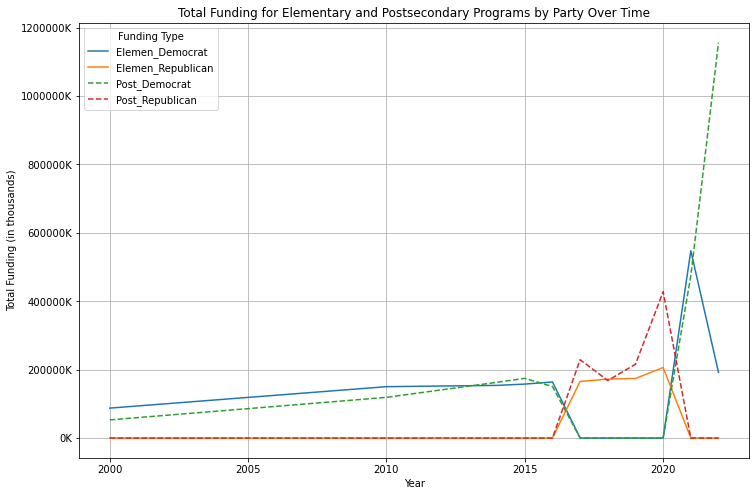

In [54]:
# Sample data for president and party information
president_data = pd.DataFrame({
    'Year': [2000, 2010, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'President': [
        'Clinton', 'Obama', 'Obama', 'Obama', 'Obama', 'Trump', 'Trump', 'Trump', 'Trump', 'Biden', 'Biden'
    ],
    'Party': [
        'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat'
    ]
})


elemenfund['Year'] = pd.to_numeric(elemenfund['Year'], errors='coerce')
postfund['Year'] = pd.to_numeric(postfund['Year'], errors='coerce')
president_data['Year'] = pd.to_numeric(president_data['Year'], errors='coerce')


elemen_merged = pd.merge(elemenfund, president_data, on='Year')
post_merged = pd.merge(postfund, president_data, on='Year')


elemen_aggregated = elemen_merged.groupby(['Year', 'Party'])['Funding'].sum().reset_index()
post_aggregated = post_merged.groupby(['Year', 'Party'])['Funding'].sum().reset_index()


elemen_pivot = elemen_aggregated.pivot(index='Year', columns='Party', values='Funding').fillna(0)
post_pivot = post_aggregated.pivot(index='Year', columns='Party', values='Funding').fillna(0)


elemen_pivot.columns = [f'Elemen_{col}' for col in elemen_pivot.columns]
post_pivot.columns = [f'Post_{col}' for col in post_pivot.columns]

# Combine both datasets
combined_pivot = pd.concat([elemen_pivot, post_pivot], axis=1).reset_index()


def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

plt.figure(figsize=(12, 8))

# Plot Elementary Level Program Funding
for col in elemen_pivot.columns:
    plt.plot(combined_pivot['Year'].values, combined_pivot[col].values, label=col)

# Plot Postsecondary Level Program Funding
for col in post_pivot.columns:
    plt.plot(combined_pivot['Year'].values, combined_pivot[col].values, label=col, linestyle='--')

plt.xlabel('Year')
plt.ylabel('Total Funding (in thousands)')
plt.title('Total Funding for Elementary and Postsecondary Programs by Party Over Time')
plt.legend(title='Funding Type')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))
plt.show()


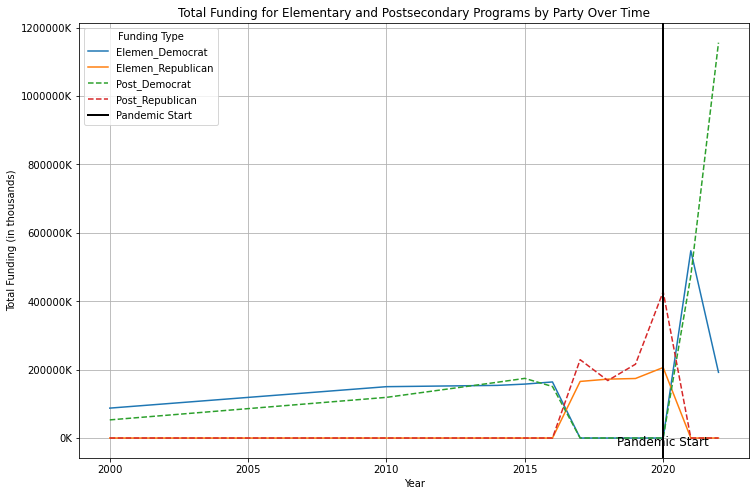

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sample data for president and party information
president_data = pd.DataFrame({
    'Year': [2000, 2010, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'President': [
        'Clinton', 'Obama', 'Obama', 'Obama', 'Obama', 'Trump', 'Trump', 'Trump', 'Trump', 'Biden', 'Biden'
    ],
    'Party': [
        'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat'
    ]
})

# Convert 'Year' to numeric in all DataFrames
elemenfund['Year'] = pd.to_numeric(elemenfund['Year'], errors='coerce')
postfund['Year'] = pd.to_numeric(postfund['Year'], errors='coerce')
president_data['Year'] = pd.to_numeric(president_data['Year'], errors='coerce')

# Merge the data with president_data on 'Year'
elemen_merged = pd.merge(elemenfund, president_data, on='Year')
post_merged = pd.merge(postfund, president_data, on='Year')

# Aggregate data: Sum of funding by Year and Party
elemen_aggregated = elemen_merged.groupby(['Year', 'Party'])['Funding'].sum().reset_index()
post_aggregated = post_merged.groupby(['Year', 'Party'])['Funding'].sum().reset_index()

# Pivot the data for better visualization
elemen_pivot = elemen_aggregated.pivot(index='Year', columns='Party', values='Funding').fillna(0)
post_pivot = post_aggregated.pivot(index='Year', columns='Party', values='Funding').fillna(0)

# Combine both pivot tables into a single DataFrame for plotting
elemen_pivot.columns = [f'Elemen_{col}' for col in elemen_pivot.columns]
post_pivot.columns = [f'Post_{col}' for col in post_pivot.columns]

# Combine both datasets
combined_pivot = pd.concat([elemen_pivot, post_pivot], axis=1).reset_index()

# Define a function to format y-axis labels to show thousands
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0fK' % (x * 1e-3)

# Plotting
plt.figure(figsize=(12, 8))

# Plot Elementary Level Program Funding
for col in elemen_pivot.columns:
    plt.plot(combined_pivot['Year'].values, combined_pivot[col].values, label=col)

# Plot Postsecondary Level Program Funding
for col in post_pivot.columns:
    plt.plot(combined_pivot['Year'].values, combined_pivot[col].values, label=col, linestyle='--')

# Add a vertical solid black line for the pandemic start
plt.axvline(x=2020, color='black', linestyle='-', linewidth=2, label='Pandemic Start')

# Add text annotation at the bottom
plt.text(2020, plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.02, 'Pandemic Start', color='black', fontsize=12, ha='center', va='bottom')

plt.xlabel('Year')
plt.ylabel('Total Funding (in thousands)')
plt.title('Total Funding for Elementary and Postsecondary Programs by Party Over Time')
plt.legend(title='Funding Type')
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands))
plt.show()


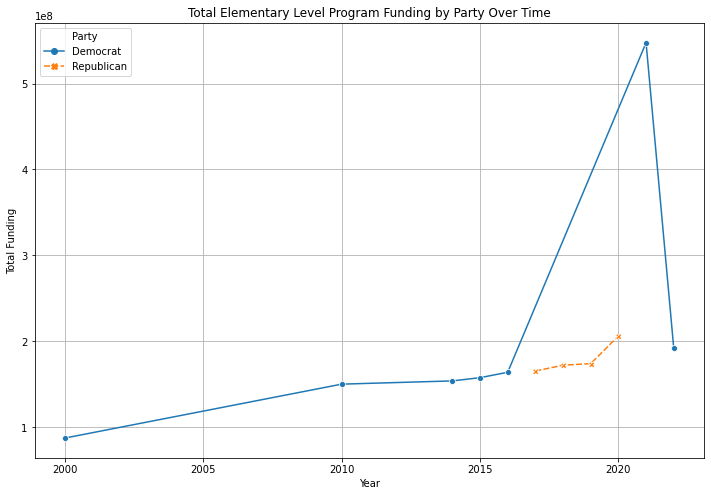

In [27]:
president_data = pd.DataFrame({
    'Year': [2000, 2010, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'President': [
        'Clinton',  # 2000 - Bill Clinton
        'Obama',    # 2010 - Barack Obama
        'Obama',    # 2014 - Barack Obama
        'Obama',    # 2015 - Barack Obama
        'Obama',    # 2016 - Barack Obama
        'Trump',    # 2017 - Donald Trump
        'Trump',    # 2018 - Donald Trump
        'Trump',    # 2019 - Donald Trump
        'Trump',    # 2020 - Donald Trump
        'Biden',    # 2021 - Joe Biden
        'Biden'     # 2022 - Joe Biden
    ],
    'Party': [
        'Democrat', # Clinton
        'Democrat', # Obama
        'Democrat', # Obama
        'Democrat', # Obama
        'Democrat', # Obama
        'Republican', # Trump
        'Republican', # Trump
        'Republican', # Trump
        'Republican', # Trump
        'Democrat', # Biden
        'Democrat'  # Biden
    ]
})

# Ensure 'Year' column is in numeric format in both DataFrames
elemenfund['Year'] = pd.to_numeric(elemenfund['Year'], errors='coerce')
president_data['Year'] = pd.to_numeric(president_data['Year'], errors='coerce')

# Merge the two DataFrames on 'Year'
merged_data = pd.merge(elemenfund, president_data, on='Year')

# Aggregate data: Sum of funding by Year and Party
aggregated_data = merged_data.groupby(['Year', 'Party'])['Funding'].sum().reset_index()

# Pivot the data for better visualization
pivot_data = aggregated_data.pivot(index='Year', columns='Party', values='Funding')


plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_data, markers=True)
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.title('Total Elementary Level Program Funding by Party Over Time')
plt.legend(title='Party')
plt.grid(True)
plt.show()

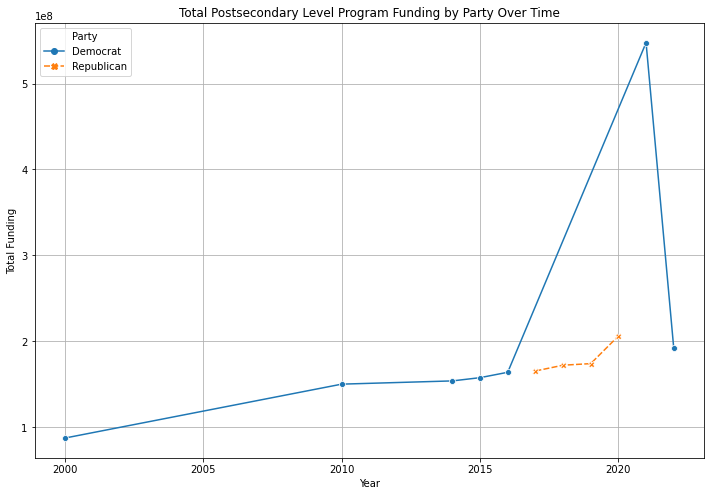

In [28]:
president_data = pd.DataFrame({
    'Year': [2000, 2010, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'President': [
        'Clinton',  # 2000 - Bill Clinton
        'Obama',    # 2010 - Barack Obama
        'Obama',    # 2014 - Barack Obama
        'Obama',    # 2015 - Barack Obama
        'Obama',    # 2016 - Barack Obama
        'Trump',    # 2017 - Donald Trump
        'Trump',    # 2018 - Donald Trump
        'Trump',    # 2019 - Donald Trump
        'Trump',    # 2020 - Donald Trump
        'Biden',    # 2021 - Joe Biden
        'Biden'     # 2022 - Joe Biden
    ],
    'Party': [
        'Democrat', # Clinton
        'Democrat', # Obama
        'Democrat', # Obama
        'Democrat', # Obama
        'Democrat', # Obama
        'Republican', # Trump
        'Republican', # Trump
        'Republican', # Trump
        'Republican', # Trump
        'Democrat', # Biden
        'Democrat'  # Biden
    ]
})

# Ensure 'Year' column is in numeric format in both DataFrames
postfund['Year'] = pd.to_numeric(postfund['Year'], errors='coerce')
president_data['Year'] = pd.to_numeric(president_data['Year'], errors='coerce')

# Merge the two DataFrames on 'Year'
merged_data = pd.merge(elemenfund, president_data, on='Year')

# Aggregate data: Sum of funding by Year and Party
aggregated_data = merged_data.groupby(['Year', 'Party'])['Funding'].sum().reset_index()

# Pivot the data for better visualization
pivot_data = aggregated_data.pivot(index='Year', columns='Party', values='Funding')


plt.figure(figsize=(12, 8))
sns.lineplot(data=pivot_data, markers=True)
plt.xlabel('Year')
plt.ylabel('Total Funding')
plt.title('Total Postsecondary Level Program Funding by Party Over Time')
plt.legend(title='Party')
plt.grid(True)
plt.show()

In [29]:
#Combining Elementary Level Funding Data Set with Presidential Data Set
combined_data = pd.concat([elemenfund, president_data['President']], axis=1)

print(combined_data)

                              Elementary Level Program    Year     Funding  \
0                              Department of Education  2000.0  20039563.0   
1                      Education for the disadvantaged  2000.0   8529111.0   
2                                   Impact aid program  2000.0    877101.0   
3                          School improvement programs  2000.0   2549971.0   
4                                     Indian education  2000.0     65285.0   
..                                                 ...     ...         ...   
634                     Social Security Administration  2022.0   1168000.0   
635                   Social Security student benefits  2022.0   1168000.0   
637  Estimated education share of federal aid to th...  2022.0    221666.0   
9                                                  NaN     NaN         NaN   
10                                                 NaN     NaN         NaN   

       logfund  Funding_standardized President  
0    16.813219

In [53]:
top_programs = postfund.groupby('Postsecondary Level')['Funding'].sum().nlargest(8).index
filtered_data = postfund[postfund['Postsecondary Level'].isin(top_programs)]

In [32]:
program_funding = postfund.groupby('Postsecondary Level')['Funding'].sum()


top_programs = program_funding.nlargest(8)


other_funding = program_funding.sum() - top_programs.sum()

# Create a new DataFrame with the top 8 programs and "Other"
top_programs = pd.concat([top_programs, pd.Series(other_funding, index=['Other'])]).reset_index()
top_programs.columns = ['Postsecondary Level', 'Funding']

# Create the pie chart
g = px.pie(
    data_frame=top_programs,
    names='Postsecondary Level',
    values='Funding',
    title='Funding Distribution for Top 8 Postsecondary Level Programs',
    color='Postsecondary Level',
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use a qualitative color palette
    template='plotly_white'
)

g.update_layout(
    title_font=dict(size=24, family='Arial', color='RebeccaPurple'),
    margin=dict(l=50, r=50, t=80, b=50),
    paper_bgcolor='rgb(255, 255, 255)',  # Change background color
    plot_bgcolor='rgb(242, 242, 242)'    # Change plot area color
)


g.show()

In [33]:
yearly_funding = postfund.groupby('Year')['Funding'].sum().reset_index()

# Create the area plot
fig = px.area(
    data_frame=yearly_funding,
    x='Year',
    y='Funding',
    title='Total Postsecondary School Program Funding by Year',
    labels={'Funding': 'Total Funding Amount', 'Year': 'Year'},
    template='plotly_dark'  # Change to 'plotly_white' or other themes if preferred
)


fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Funding Amount',
    title_font=dict(size=24, family='Arial', color='RebeccaPurple'),
    xaxis=dict(
        title_font=dict(size=18, family='Arial', color='black'),
        tickfont=dict(size=14, family='Arial', color='black')
    ),
    yaxis=dict(
        title_font=dict(size=18, family='Arial', color='black'),
        tickfont=dict(size=14, family='Arial', color='black')
    ),
    margin=dict(l=50, r=50, t=80, b=50),
    paper_bgcolor='rgb(255, 255, 255)',  # Change background color
    plot_bgcolor='rgb(242, 242, 242)'    # Change plot area color
)

# Show the plot
fig.show()

In [34]:
#Predictive Model
president_data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010],
    'President': ['Clinton', 'Clinton', 'Bush', 'Bush', 'Bush', 'Bush', 'Obama', 'Obama', 'Obama', 'Obama', 'Obama'],
    'Party': ['Democrat', 'Democrat', 'Republican', 'Republican', 'Republican', 'Republican', 'Democrat', 'Democrat', 'Democrat', 'Democrat', 'Democrat']
})

# Encode the Party column
le = LabelEncoder()
president_data['Party_Code'] = le.fit_transform(president_data['Party'])

# Merge datasets
elemen_merged = pd.merge(elemenfund, president_data, on='Year')
post_merged = pd.merge(postfund, president_data, on='Year')

# Prepare features and target for Elementary Funding
X_elemen = elemen_merged[['Party_Code']]
y_elemen = elemen_merged['Funding']

# Prepare features and target for Postsecondary Funding
X_post = post_merged[['Party_Code']]
y_post = post_merged['Funding']

# Split the data into training and testing sets
X_train_elemen, X_test_elemen, y_train_elemen, y_test_elemen = train_test_split(X_elemen, y_elemen, test_size=0.2, random_state=0)
X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(X_post, y_post, test_size=0.2, random_state=0)

# Train Linear Regression Models
model_elemen = LinearRegression()
model_elemen.fit(X_train_elemen, y_train_elemen)

model_post = LinearRegression()
model_post.fit(X_train_post, y_train_post)

# Predict funding for Democratic and Republican administrations
# Party_Code: 0 for Democrat, 1 for Republican
future_parties = pd.DataFrame({'Party_Code': [0, 1]})

predictions_elemen = model_elemen.predict(future_parties)
predictions_post = model_post.predict(future_parties)

# Display results
party_names = le.inverse_transform([0, 1])
results = pd.DataFrame({
    'Party': party_names,
    'Predicted_Elementary_Funding': predictions_elemen,
    'Predicted_Postsecondary_Funding': predictions_post
})

print(results)

        Party  Predicted_Elementary_Funding  Predicted_Postsecondary_Funding
0    Democrat                  2.549881e+06                     1.239072e+06
1  Republican                  2.549881e+06                     1.239072e+06


In [36]:
elemenfund.head(9)

,Elementary Level Program,Year,Funding,logfund,Funding_standardized
0,Department of Education,2000,20039563.0,16.813219,1.074498
1,Education for the disadvantaged,2000,8529111.0,15.958996,0.266123
2,Impact aid program,2000,877101.0,13.684377,-0.271276
3,School improvement programs,2000,2549971.0,14.751593,-0.153791
4,Indian education,2000,65285.0,11.086518,-0.328289
5,English Language Acquisition,2000,362662.0,12.801227,-0.307405
6,Special education,2000,4948977.0,15.414691,0.014691
7,Vocational and adult education,2000,1462977.0,14.195984,-0.230130
8,Education Reform--Goals 2000,2000,1243479.0,14.033424,-0.245545


In [37]:
 
model_interaction = ols('logfund ~ Year', data=elemenfund).fit()

print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                logfund   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.278
Date:                Wed, 16 Oct 2024   Prob (F-statistic):            0.00245
Time:                        23:33:07   Log-Likelihood:                -1126.8
No. Observations:                 458   AIC:                             2258.
Df Residuals:                     456   BIC:                             2266.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -121.4598     44.136     -2.752      0.0

In [35]:
# Run the regression with 'logfund' instead of 'Funding'
model_interaction = ols('logfund ~ Year', data=elemenfund).fit()

# Extract relevant statistics
summary_data = {
    "Metric": [
        "R-squared", 
        "Adjusted R-squared", 
        "F-statistic", 
        "P-value (F-statistic)", 
        "Coefficient (Year)", 
        "P-value (Year)", 
        "Standard Error (Year)"
    ],
    "Value": [
        round(model_interaction.rsquared, 4), 
        round(model_interaction.rsquared_adj, 4), 
        round(model_interaction.fvalue, 4), 
        round(model_interaction.f_pvalue, 4), 
        round(model_interaction.params['Year'], 4), 
        round(model_interaction.pvalues['Year'], 4), 
        round(model_interaction.bse['Year'], 4)
    ]
}

# Create DataFrame for display
summary_df = pd.DataFrame(summary_data)

# Display the DataFrame in a tabular format
print(summary_df.to_string(index=False))


               Metric  Value
            R-squared 0.0199
   Adjusted R-squared 0.0178
          F-statistic 9.2777
P-value (F-statistic) 0.0025
   Coefficient (Year) 0.0667
       P-value (Year) 0.0025
Standard Error (Year) 0.0219


In [38]:
postfund.head(10)

,Postsecondary Level,Year,Funding,logfund,Funding_standardized
0,Department of Education,2000,10727315.0,16.188304,0.166310
1,Student financial assistance,2000,9060317.0,16.019415,0.114613
2,Direct Loan Program,2000,2862240.0,14.867115,-0.077603
3,Federal Family Education Loan (FFEL) Program,2000,2707473.0,14.811526,-0.082402
4,Higher education,2000,1530779.0,14.241287,-0.118894
5,Facilities--loans and insurance,2000,2174.0,7.684324,-0.166299
6,College housing loans,2000,41886.0,10.642707,-0.165068
8,Historically Black Colleges and Universities\n...,2000,150.0,5.010635,-0.166362
9,Gallaudet College and Howard University,2000,291060.0,12.581285,-0.157340
10,National Technical Institute for the Deaf,2000,43836.0,10.688211,-0.165007


In [39]:
#Regression of logfund
# Run the regression with 'logfund' instead of 'Funding'
model_interaction = ols('logfund ~ Year', data=postfund).fit()

# Print the summary of the regression model
print(model_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                logfund   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.011
Date:                Wed, 16 Oct 2024   Prob (F-statistic):             0.0145
Time:                        23:33:12   Log-Likelihood:                -1533.5
No. Observations:                 621   AIC:                             3071.
Df Residuals:                     619   BIC:                             3080.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -84.0255     39.124     -2.148      0.0